In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## Задача классификации

Источник: датасет Kaggle (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [4]:
df_clf =  pd.read_csv('diabetes.csv')
df_clf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies – количество беременностей;

Glucose – концентрация глюкозы в плазме крови;

BloodPressure – дистолическое давление крови;

SkinThickness – толщина кожи трицепса;

Insulin – содержания инсулина в крови;

BMI – индекс массы тела;

DiabetesPedigreeFunction – показатель функции генетического диабета;

Age – возраст;

Outcome – наша целевая переменная, где 0 – нет диабета, 1 – есть.

Разбиваем датаесет на тестовую и тренировочную выборки

In [5]:
from sklearn.model_selection import train_test_split

target_df_clf = df_clf['Outcome']
feature_df_clf = df_clf.drop(columns=['Outcome'])

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(feature_df_clf, 
                                                                    target_df_clf,
                                                                    test_size=0.25, 
                                                                    random_state=11)

Подбор гиперпараметров с использованием GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Прописываем гиперпараметры по которые будем подбирать

# Max_depth  
# максимальный уровень (глубину) каждого дерева в модели случайного леса. 
# Более глубокое дерево показывает хорошие результаты и собирает много информации об обучающих данных, 
# но плохо поддается обобщению для тестовых данных. 
# По умолчанию в библиотеке Scikit-Learn это значение установлено в "None", что значит, 
# такие деревья оставлены для полного расширения.

# Max_features 
# Максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении. 
# По умолчанию в Scikit-Learn это значение устанавливается равным квадратному корню из общего числа переменных в наборе данных.

# N_estimators 
# Количество деревьев решений в лесу. 
# По умолчанию в Scikit-Learn число оценщиков (estimators) равно 10.

# Min_samples_leaf
# Минимальное количество образцов, необходимое для нахождения в листовом узле каждого дерева. 
# В Scikit-Learn значение по умолчанию равно 1.

# Min_samples_spli 
# Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева. 
# В Scikit-Learn значение по умолчанию равно 2.

tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(1, 25)], 
               'max_leaf_nodes': [i for i in range(1, 20)]}]

# Подбор гипермараметров модели с использованием GridSearchCV с кроссвалидацией CV = 10
dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)

# best_estimator_ — лучшая модель
# best_score_ — ошибка, полученная на лучшей модели.
# best_params_ — гиперпараметры лучшей модели

# Обучение модели DecisionTreeClassifier
dtc_model.fit(X = X_train_clf.values,
          y = y_train_clf)


prediction_clf = dtc_model.best_estimator_.predict(X_test_clf)
score = accuracy_score(y_test_clf, prediction_clf)

print(f'Лучшие найденные параметры: {dtc_model.best_estimator_}')
print(f'Точность на тренировочных данных: {round(dtc_model.best_score_*100, 2)}')
print(f'Точность на тестовых данных: {round(score*100, 2)}')

Визуализация результата и просмотр распределения весов для классификации целевого признака

[Text(0.47368421052631576, 0.9375, 'X[1] <= 131.5\nentropy = 0.935\nsamples = 576\nvalue = [374, 202]'),
 Text(0.15789473684210525, 0.8125, 'X[5] <= 26.4\nentropy = 0.724\nsamples = 388\nvalue = [310, 78]'),
 Text(0.10526315789473684, 0.6875, 'entropy = 0.139\nsamples = 102\nvalue = [100, 2]'),
 Text(0.21052631578947367, 0.6875, 'X[7] <= 28.5\nentropy = 0.835\nsamples = 286\nvalue = [210, 76]'),
 Text(0.10526315789473684, 0.5625, 'X[5] <= 30.45\nentropy = 0.594\nsamples = 146\nvalue = [125, 21]'),
 Text(0.05263157894736842, 0.4375, 'entropy = 0.169\nsamples = 40\nvalue = [39, 1]'),
 Text(0.15789473684210525, 0.4375, 'entropy = 0.699\nsamples = 106\nvalue = [86, 20]'),
 Text(0.3157894736842105, 0.5625, 'X[1] <= 89.5\nentropy = 0.967\nsamples = 140\nvalue = [85, 55]'),
 Text(0.2631578947368421, 0.4375, 'entropy = 0.391\nsamples = 26\nvalue = [24, 2]'),
 Text(0.3684210526315789, 0.4375, 'X[6] <= 0.218\nentropy = 0.996\nsamples = 114\nvalue = [61, 53]'),
 Text(0.2631578947368421, 0.3125, '

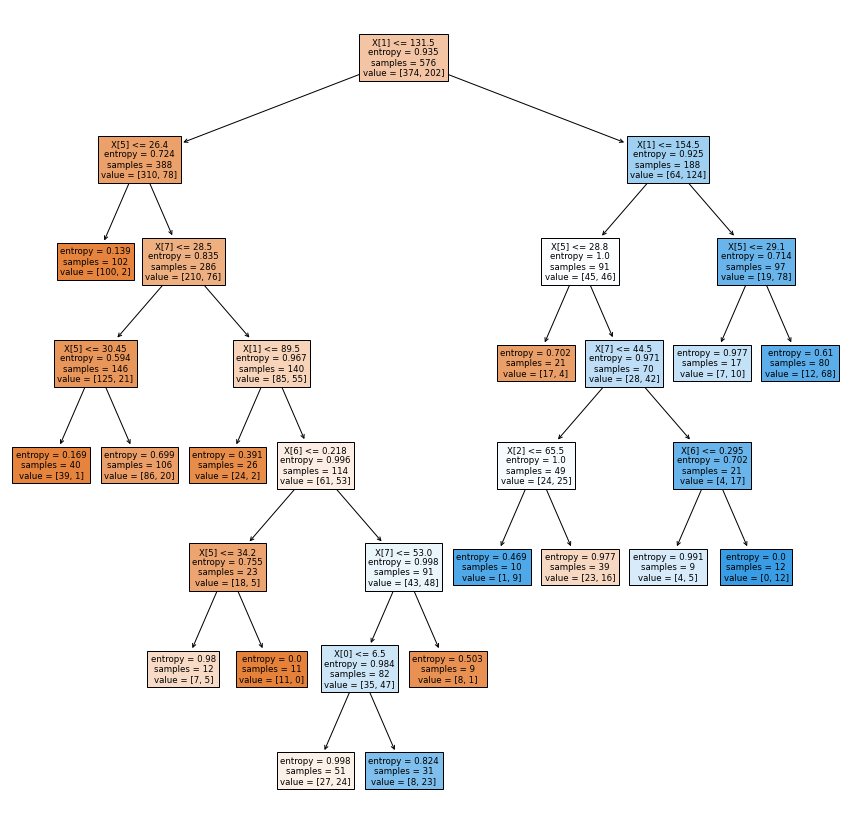

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True)

Визуализация c помощью библиотеки dtreeviz

In [ ]:
# %pip install dreeviz
from dtreeviz.trees import dtreeviz

image_est = dtreeviz(dtc_model.best_estimator_,
               x_data=X_train_clf,
               y_data=y_train_clf,
               target_name='class',
               feature_names=[i for i in X_train_clf.columns],
               class_names=['Не диабет', 'Диабет'],
               title="Визуализация подбора весов Decision Tree")
image_est.save('dtreeviz.svg')

## Задача регрессии

Источник: датасет Kaggle (https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df_reg = pd.read_csv('exams.csv')
df_reg.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Gender – пол студента;

Race/ethnicity – этническая группа (данные обезличены);

Parental level of education – уровень образования родителей;

Lunch – тип питания;

Test preparation score – оценка подготовки к экзаменам;

Math score – оценка по математике;

Reading score – оценка по чтению;

Writing score – оценка по письму.

In [20]:
# Работа с категориальными признаками
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_reg = df_reg.apply(le.fit_transform)

target_df_reg = df_reg['math score']
feature_df_reg = df_reg[[i for i in df_reg.columns if i != 'math score']]

# Разбиваем датасет на тестовый и тренировочный
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(feature_df_reg,
                                                                    target_df_reg, 
                                                                    test_size=0.30, 
                                                                    random_state=11)

Обучаем модель

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_param = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(1, 25)], 
              'max_leaf_nodes': [i for i in range(2, 20)],
              }]

dtr_model = GridSearchCV(DecisionTreeRegressor(), tree_param, cv=5)
dtr_model.fit(X = X_train_reg.values,
              y = y_train_reg)

prediction_reg = dtr_model.best_estimator_.predict(X_test_reg)
score_reg = mean_absolute_error(prediction_reg, y_test_reg)

print(f'Лучшие найденные параметры: {dtr_model.best_estimator_}')
print(f'Средняя абсолютная ошибка на тестовых данных: {round(score_reg, 3)}')

Лучшие найденные параметры: DecisionTreeRegressor(max_depth=5, max_leaf_nodes=19, min_samples_leaf=6)
Средняя абсолютная ошибка на тестовых данных: 5.712


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


Визуализация

[Text(0.5, 0.9166666666666666, 'X[5] <= 44.5\nsquared_error = 234.232\nsamples = 700\nvalue = 42.356'),
 Text(0.25, 0.75, 'X[6] <= 28.5\nsquared_error = 136.166\nsamples = 406\nvalue = 33.401'),
 Text(0.125, 0.5833333333333334, 'X[0] <= 0.5\nsquared_error = 100.769\nsamples = 135\nvalue = 24.03'),
 Text(0.0625, 0.4166666666666667, 'X[5] <= 17.0\nsquared_error = 68.297\nsamples = 43\nvalue = 15.93'),
 Text(0.03125, 0.25, 'squared_error = 25.653\nsamples = 11\nvalue = 5.727'),
 Text(0.09375, 0.25, 'squared_error = 34.871\nsamples = 32\nvalue = 19.438'),
 Text(0.1875, 0.4166666666666667, 'X[6] <= 16.5\nsquared_error = 70.955\nsamples = 92\nvalue = 27.815'),
 Text(0.15625, 0.25, 'squared_error = 39.962\nsamples = 25\nvalue = 19.28'),
 Text(0.21875, 0.25, 'X[6] <= 24.5\nsquared_error = 45.194\nsamples = 67\nvalue = 31.0'),
 Text(0.1875, 0.08333333333333333, 'squared_error = 41.151\nsamples = 49\nvalue = 29.306'),
 Text(0.25, 0.08333333333333333, 'squared_error = 27.127\nsamples = 18\nvalue 

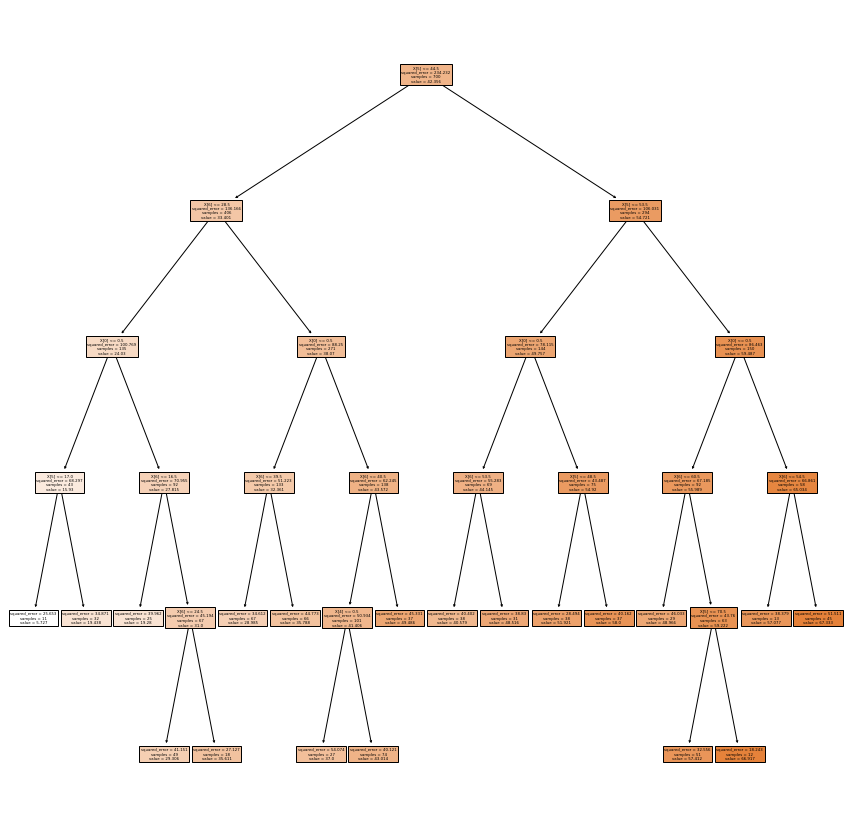

In [22]:
plt.figure(figsize=(15,15))
plot_tree(dtr_model.best_estimator_, filled=True, impurity=True)